In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pysam
import pysamstats
from itertools import islice
import pickle

/anaconda3/envs/bioinfo2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: pysam.libcalignedsegment.PileupColumn size changed, may indicate binary incompatibility. Expected 72 from C header, got 88 from PyObject
  return f(*args, **kwds)


In [83]:
kwargs = {'chrom': 'NC_005071.1', 'one_based': False, 'window_size': 100}
it = pysamstats.stat_coverage_binned(pysam.Samfile('bwa_output.sorted.bam'), pysam.Fastafile('reference.fasta'), **kwargs)
data_bwa = []
for rec in islice(it, 25000):
    temp = list(rec.values())
    data_bwa.append(temp)
with open('data_bwa.text', 'wb') as fp:
    pickle.dump(data_bwa, fp)

In [84]:
kwargs = {'chrom': 'NC_005071.1', 'one_based': False, 'window_size': 100}
it = pysamstats.stat_coverage_binned(pysam.Samfile('bowtie2_output.sorted.bam'), pysam.Fastafile('reference.fasta'), **kwargs)
data_bowtie2 = []
for rec in islice(it, 25000):
    temp = list(rec.values())
    data_bowtie2.append(temp)
with open('data_bowtie2.text', 'wb') as fp:
    pickle.dump(data_bowtie2, fp)

In [4]:
with open('data_bwa.text', 'rb') as fp:
    data_bwa = pickle.load(fp)
with open('data_bowtie2.text', 'rb') as fp:
    data_bowtie2 = pickle.load(fp)

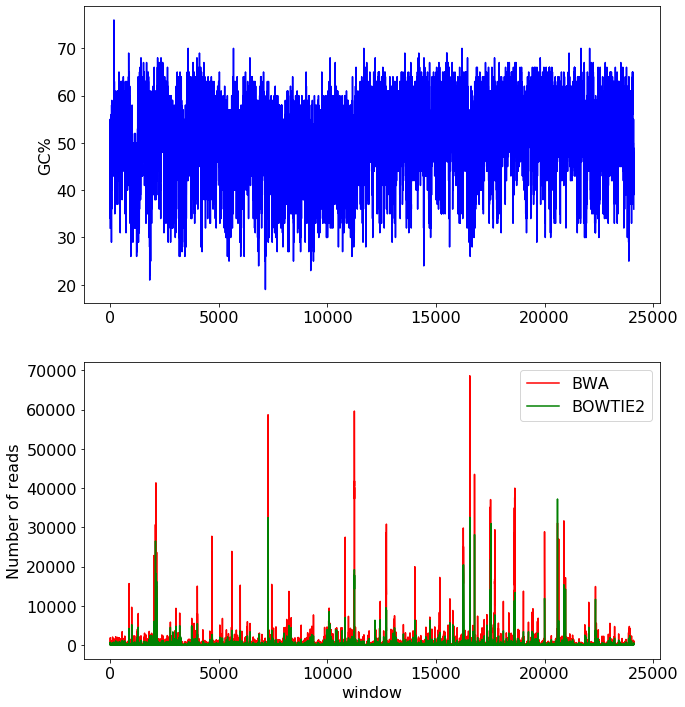

In [5]:
# GC content vs reads
plt.rcParams.update({'font.size': 16})
GC = np.asarray([x[0] for x in data_bwa])
reads_bwa = np.asarray([x[1] for x in data_bwa])
reads_bowtie2 = np.asarray([x[1] for x in data_bowtie2])
plt.figure(figsize=(10, 12))
plt.subplots_adjust(left=0.15, right=0.95)
plt.subplot(2, 1, 1)
plt.plot(GC, 'b', linewidth=1.5)
plt.ylabel('GC%')
#plt.savefig('Reads.pdf')

plt.subplot(2, 1, 2)
plt.plot(reads_bwa, '-r',linewidth=1.5)
plt.plot(reads_bowtie2, '-g',linewidth=1.5)
plt.legend(['BWA','BOWTIE2'], loc='upper right')
plt.xlabel('window')
plt.ylabel('Number of reads')
plt.savefig('Reads.pdf')
plt.show()

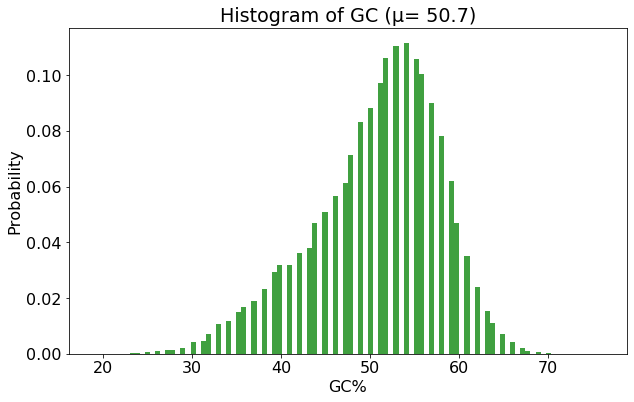

In [53]:
# GC histogram
plt.figure(figsize=(10, 6))
plt.hist(GC,density=True, bins = 100, facecolor='g', alpha=0.75)
plt.xlabel('GC%')
plt.ylabel('Probability')
plt.title('Histogram of GC (' u"\u03bc" '= %s)'%round(GC.mean(),1))
plt.savefig('GC_Histogram.pdf')
plt.show()

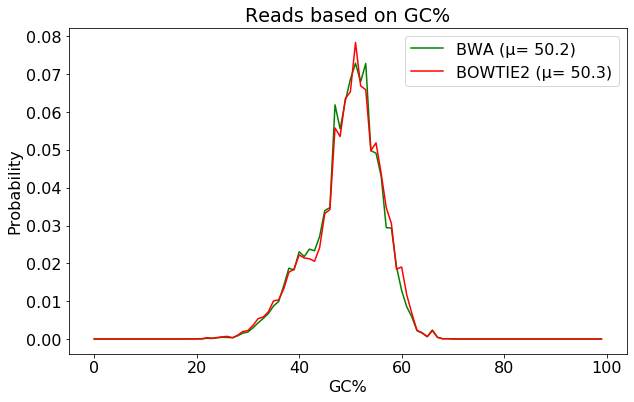

In [48]:
# Distribution for read aligners
reads_histo = np.zeros([2,100])
for i in range(len(data_bwa)):
    reads_histo[0][data_bwa[i][0]-1] += data_bwa[i][1]
    reads_histo[1][data_bowtie2[i][0]-1] += data_bowtie2[i][1]    

mean = [0,0]
for i in range(100):
    mean[0] += reads_histo[0][i]*(i+1)
    mean[1] += reads_histo[1][i]*(i+1)
mean[0] = round(mean[0]/sum(reads_histo[0][:]),1)
mean[1] = round(mean[1]/sum(reads_histo[1][:]),1)

plt.figure(figsize=(10, 6))
plt.plot(reads_histo[0][:]/sum(reads_histo[0][:]),'g')
plt.plot(reads_histo[1][:]/sum(reads_histo[1][:]),'r')
plt.xlabel('GC%')
plt.ylabel('Probability')
plt.title('Reads based on GC%')
plt.legend(['BWA (' u"\u03bc" '= %s)'%mean[0],'BOWTIE2 (' u"\u03bc" '= %s)'%mean[1]], loc='upper right')
plt.savefig('pdf_aligners.pdf')
plt.show()

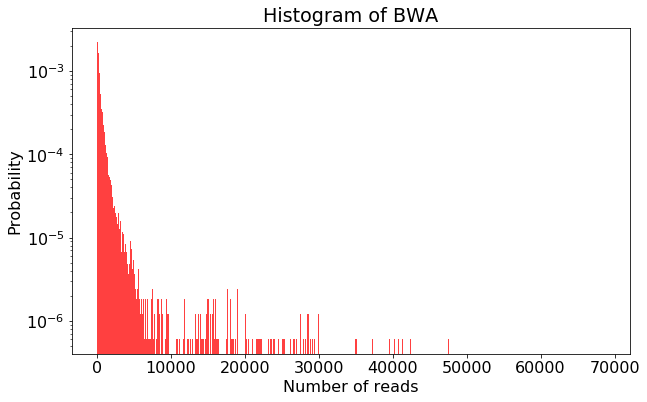

In [136]:
# histogram for BWA read aligner
plt.figure(figsize=(10, 6))
plt.hist(reads_bwa,density=True, bins = 1000, facecolor='r', alpha=0.75)
plt.xlabel('Number of reads')
plt.ylabel('Probability')
plt.yscale('log')
plt.title('Histogram of BWA')
plt.savefig('BWA_Histogram.pdf')
plt.show()

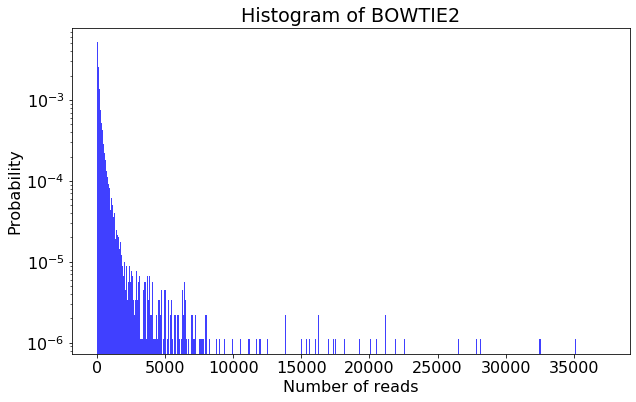

In [137]:
# histogram for bowtie2 aligner
plt.figure(figsize=(10, 6))
plt.hist(reads_bowtie2,density=True, bins = 1000, facecolor='b', alpha=0.75)
plt.xlabel('Number of reads')
plt.ylabel('Probability')
plt.yscale('log')
plt.title('Histogram of BOWTIE2')
plt.savefig('BOWTIE2_Histogram.pdf')
plt.show()

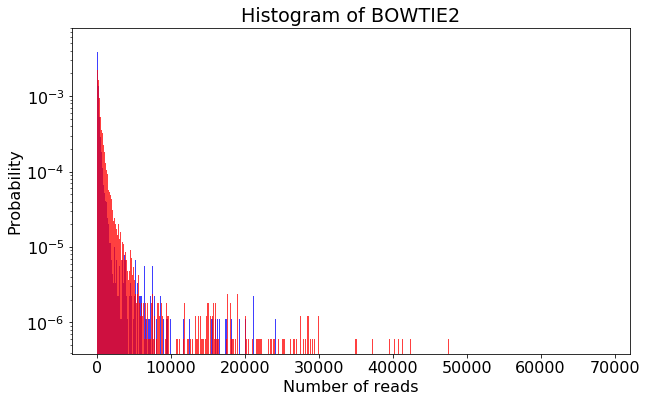

In [9]:
plt.hist(reads_bowtie2,density=True, bins = 1000, facecolor='b', alpha=0.75)
plt.hist(reads_bwa,density=True, bins = 1000, facecolor='r', alpha=0.75)
plt.xlabel('Number of reads')
plt.ylabel('Probability')
plt.yscale('log')
plt.title('Histogram of BOWTIE2')
plt.savefig('BOWTIE2_Histogram.pdf')
plt.show()